# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|arecibo
Processing record 2|kaitangata
Processing record 3|carnarvon
Processing record 4|puerto ayora
Processing record 5|castro
Processing record 6|siderno
Processing record 7|eyl
Processing record 8|busselton
Processing record 9|khatanga
Processing record 10|mataura
Processing record 11|takoradi
Processing record 12|geraldton
Processing record 13|chuy
Processing record 14|beloha
Processing record 15|punta arenas
Processing record 16|bluff
Processing record 17|atuona
Processing record 18|rikitea
Processing record 19|ponta do sol
Processing record 20|klaksvik
Processing record 21|port hardy
Processing record 22|yellowknife
Processing record 23|dikson
City not found. skipping.
Processing record 24|chowchilla
Processing record 25|butaritari
Processing record 26|torbay
Processing record 27|albany
Processing record 28|ushuaia
Processing record 29|vila velha
Processing record 30|thompson
Processing record 31|nanortalik
City not found. skipping.
City not found. skipping.


In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed})

# Show Record Count
city_data_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Arecibo,0,PR,1680569136,79,18.4724,-66.7157,25.72,0.45
1,Kaitangata,30,NZ,1680569192,53,-46.2817,169.8464,17.18,3.07
2,Carnarvon,47,AU,1680569192,70,-24.8667,113.6333,24.43,6.13
3,Puerto Ayora,21,EC,1680569193,91,-0.7393,-90.3518,27.53,1.34
4,Castro,2,BR,1680569193,85,-24.7911,-50.0119,15.28,1.28


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Arecibo,0,PR,1680569136,79,18.4724,-66.7157,25.72,0.45
1,Kaitangata,30,NZ,1680569192,53,-46.2817,169.8464,17.18,3.07
2,Carnarvon,47,AU,1680569192,70,-24.8667,113.6333,24.43,6.13
3,Puerto Ayora,21,EC,1680569193,91,-0.7393,-90.3518,27.53,1.34
4,Castro,2,BR,1680569193,85,-24.7911,-50.0119,15.28,1.28


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

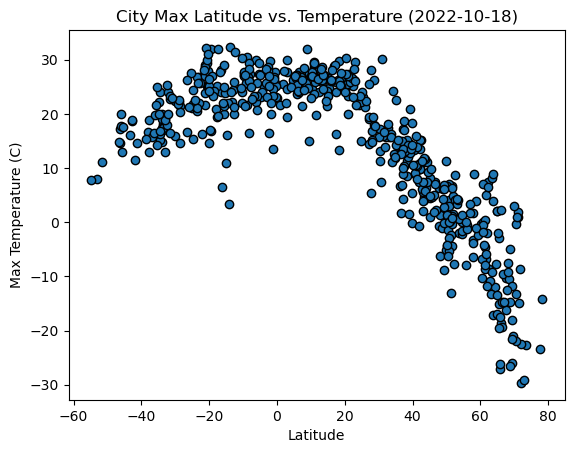

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

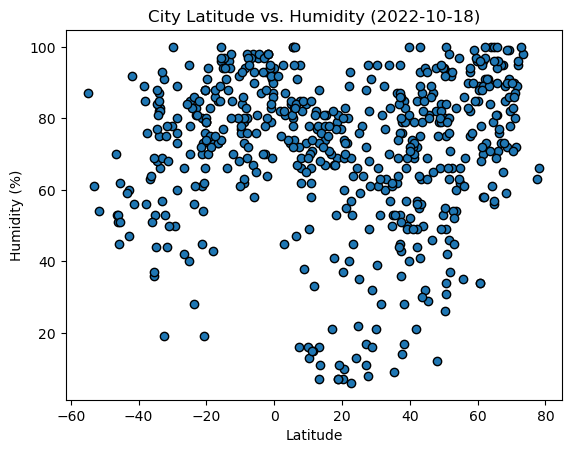

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

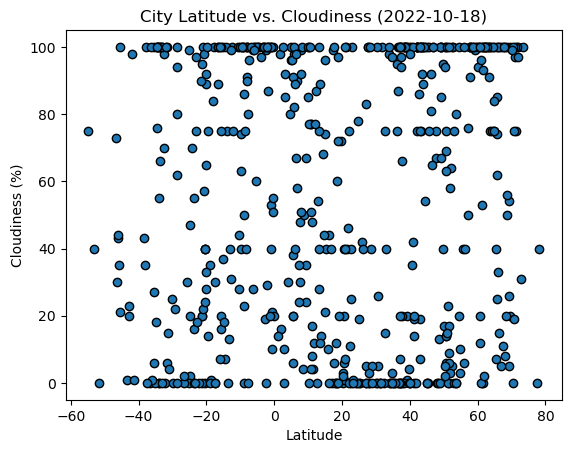

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

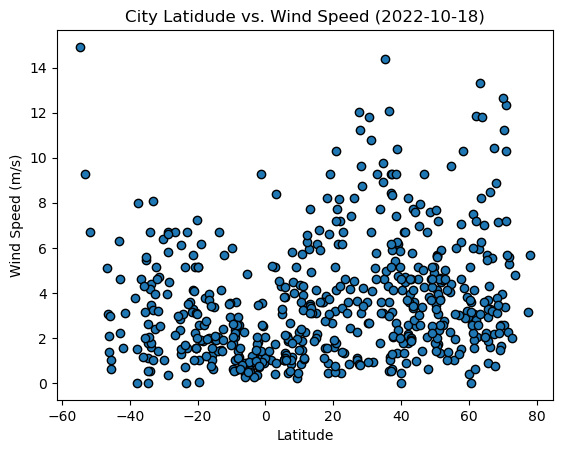

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors= 'black')

# Incorporate the other graph properties
plt.title('City Latidude vs. Wind Speed (2022-10-18)')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]
# Display sample data
northern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Arecibo,0,PR,1680569136,79,18.4724,-66.7157,25.72,0.45
5,Siderno,100,IT,1680569193,85,38.2779,16.3020,11.39,5.40
6,Eyl,99,SO,1680569193,66,7.9803,49.8164,27.94,5.82
8,Khatanga,100,RU,1680569193,95,71.9667,102.5000,-29.68,5.30
10,Takoradze,96,GH,1680569194,84,4.8845,-1.7554,26.61,3.06


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
1,Kaitangata,30,NZ,1680569192,53,-46.2817,169.8464,17.18,3.07
2,Carnarvon,47,AU,1680569192,70,-24.8667,113.6333,24.43,6.13
3,Puerto Ayora,21,EC,1680569193,91,-0.7393,-90.3518,27.53,1.34
4,Castro,2,BR,1680569193,85,-24.7911,-50.0119,15.28,1.28
7,Busselton,66,AU,1680569193,66,-33.6500,115.3333,18.19,4.41


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.9094789728656751


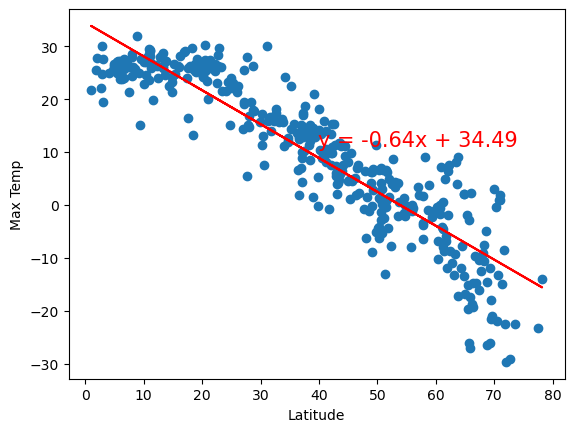

None


In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel('Max Temp')
print(linear_reg_plot(x_values, y_values))

The r-squared is: 0.5545619134517568


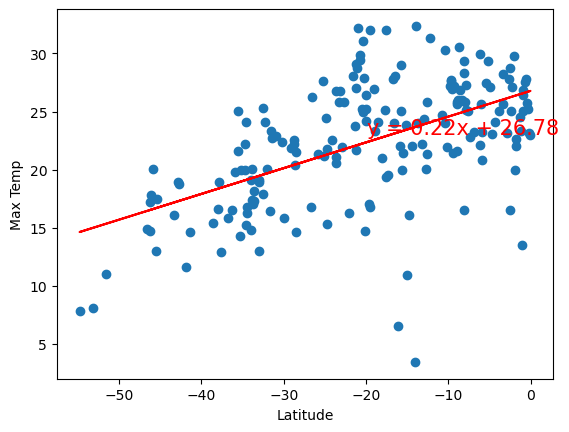

None


In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel('Max Temp')
print(linear_reg_plot(x_values, y_values))

**Discussion about the linear relationship:** In the northern hemisphere the farther away from the equator (0) the lower the temperature. In the southern hemisphere the closer to the equator (0) the higher the temperature. Overall the higher the latitude the lower the temperature. The northern hemisphere has a more dramatic difference in the temperatures, ranging from 30 to -30, and a steeper slope. While the southern hemisphere tends to range between 15 and 30 degrees and has a more gentle slope. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.24563701573688448


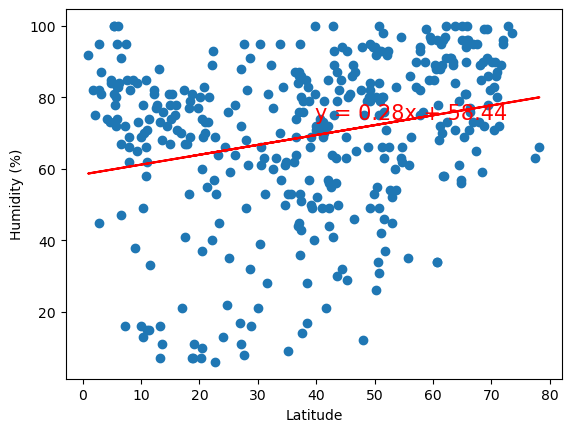

None


In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values, y_values))

The r-squared is: 0.45837899388029957


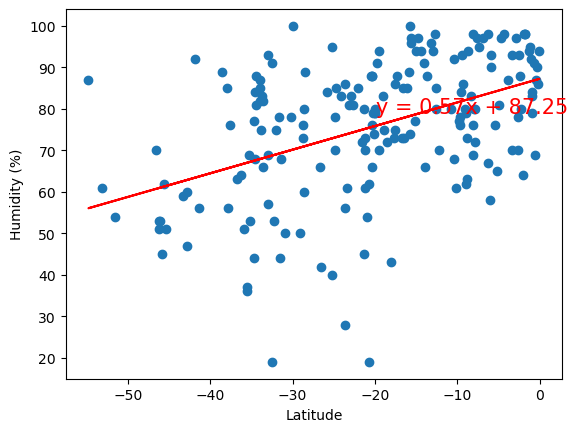

None


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))



**Discussion about the linear relationship:** The data is scattered and does not show that there is any correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1664259068734161


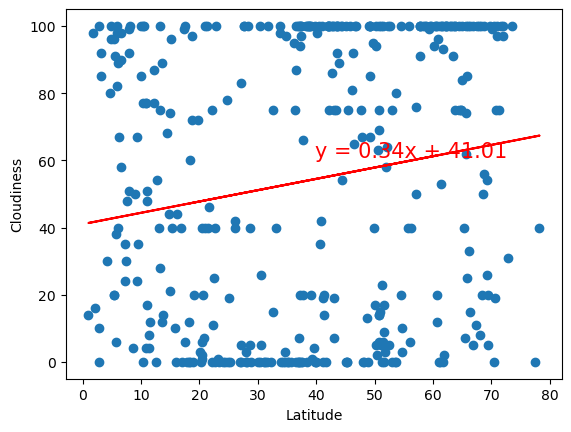

None


In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))


The r-squared is: 0.2438654314047434


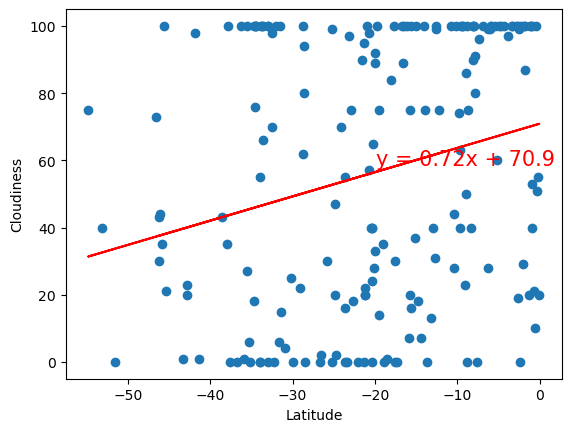

None


In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** The data is scattered and does not show that there is any correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.1582880388885912


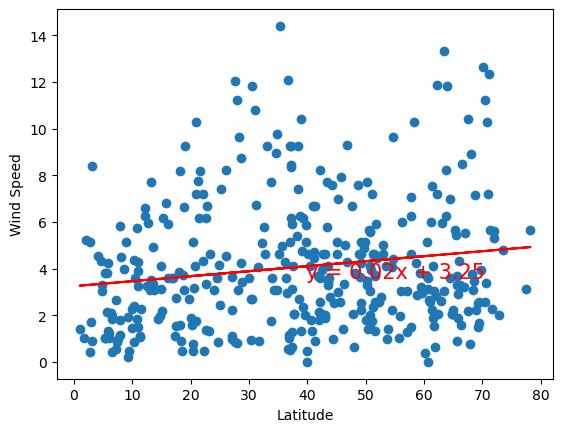

None


In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.3805846857623178


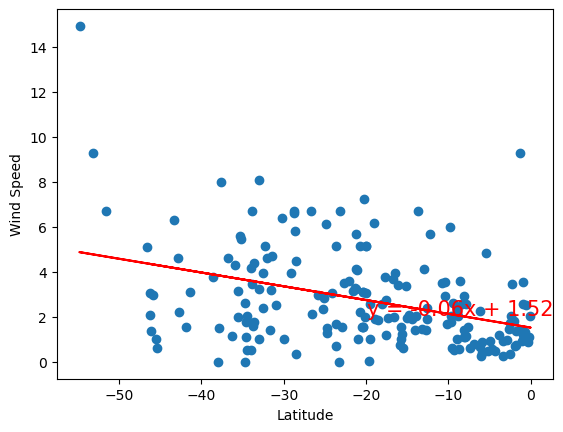

None


In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** The data is scattered and does not show that there is any correlation between latitude and windspeed, however the southern hemispher is slightly more stable than the northern hemisphere. 